In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.svm import SVR


In [6]:
X_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_asthma')
X_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_asthma')
y_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_asthma')
y_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_asthma')

In [7]:
X_test.drop('CensusTract', axis=1, inplace=True)
X_train.drop('CensusTract', axis=1, inplace=True)
y_test.drop('CensusTract', axis=1, inplace=True)
y_train.drop('CensusTract', axis=1, inplace=True)


In [8]:
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
y_train.shape


(54242,)

In [9]:
X_test.shape

(18081, 11)

In [10]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,9.735472,46.794542,1.660387,0.442277,0.711873,1.736046,0.633270,0.137163,1.402176,1.474953,-0.220211
1,9.052414,43.321456,1.769878,1.299548,1.655565,1.979977,1.072153,-1.092847,1.803730,1.146110,-0.350197
2,6.620032,41.096520,1.600201,0.324004,0.192666,1.843888,1.525120,1.026381,0.938620,1.485786,-0.353921
3,8.153513,41.664212,-0.788929,0.353334,0.379114,-0.777737,-0.054348,-0.948158,-0.478555,-0.912995,0.245826
4,9.069030,39.317200,-1.068739,0.730353,0.789214,-0.220251,-0.688572,-1.172219,-0.822988,-0.628641,-0.434456


In the pre-processeing notebook, I have already done multiple OLS on the data and found no reasonable correlation. In this notebook, the first type of model I will use will be random forest.

In [28]:
# Instantiate RandomForestRegressor and randomly search for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {'n_estimators': sp_randInt(1,500), 'max_depth':sp_randInt(1,30)}

rs = RandomizedSearchCV(rf, params)

In [29]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2d535c730>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2d51d46a0>})

In [30]:
rs.best_estimator_

RandomForestRegressor(max_depth=26, n_estimators=364)

In [16]:
rf = RandomForestRegressor(max_depth=26, n_estimators=364)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=26, n_estimators=364)

In [17]:
y_pred = rf.predict(X_test)

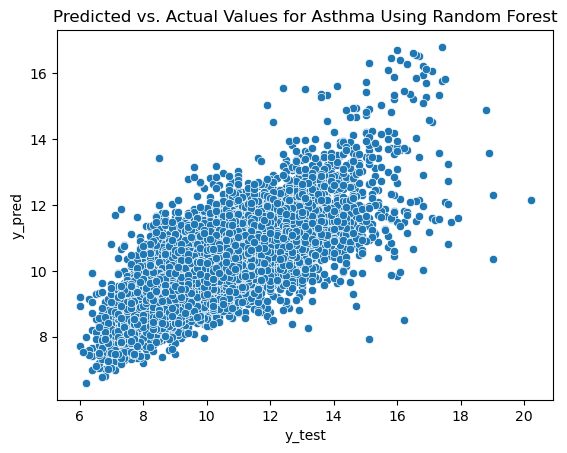

In [19]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for Asthma Using Random Forest')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [34]:
rf.score(X_test, y_test)

0.5524085218869133

This is the best model so far although the results are still not very good.

The next model I will try is a support vector machine regressor.

In [3]:
# Instantiate support vector machine regressor and randomly search for best hyperparameters C and epsilon.
svm = SVR()
params = {'C': sp_randFloat(.01,10), 'epsilon':sp_randFloat(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [11]:
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x105eadb50>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x148bdf640>})

In [12]:
svm_rs.best_estimator_

SVR(C=9.758131857482118, epsilon=0.9168171272503549)

In [13]:
svm = SVR(C=9.758131857482118, epsilon=0.9168171272503549)
svm.fit(X_train, y_train)

SVR(C=9.758131857482118, epsilon=0.9168171272503549)

In [14]:
svm.score(X_test, y_test)

0.1874958057839976

The very low R2 value shows that SVM regression is not a good predictor for this data.